## Part 1: Exploratory Analysis and Visualization

In [169]:
import numpy as np
import pandas as pd

In [170]:
# read in data file

homes_df = pd.read_csv('WestRoxbury_unprocessed.csv')

### Basic Exploratory Analysis

In [171]:
# print the data types of each column
homes_df.dtypes

TOTAL_VALUE    float64
LOT_SQFT       float64
YR_BUILT         int64
LIVING_AREA    float64
FLOORS         float64
ROOMS            int64
BEDROOMS         int64
FULL_BATH        int64
HALF_BATH        int64
KITCHEN          int64
FIREPLACE        int64
REMODEL         object
dtype: object

In [172]:
# print the shape of the dataframe
homes_df.shape

(5802, 12)

In [173]:
# check for null values
homes_df.isnull().sum()

TOTAL_VALUE    0
LOT_SQFT       1
YR_BUILT       0
LIVING_AREA    2
FLOORS         0
ROOMS          0
BEDROOMS       0
FULL_BATH      0
HALF_BATH      0
KITCHEN        0
FIREPLACE      0
REMODEL        0
dtype: int64

In [174]:
# look at each category in "REMODEL"
homes_df['REMODEL'].value_counts()

None      4346
Recent     875
Old        581
Name: REMODEL, dtype: int64

In [175]:
# look at the frequency of occurence in the "ROOMS" column
homes_df['ROOMS'].value_counts()

7     1769
6     1669
8      936
5      578
9      450
10     200
4       71
11      66
12      45
13      10
14       5
3        3
Name: ROOMS, dtype: int64

In [176]:
# look at the correlation between all of the predictors (be sure to only focus on the predictors, and not the target variable)
predictor_df = homes_df[['LOT_SQFT', 'YR_BUILT', 'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH',
                        'HALF_BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL']]
response_df = homes_df['TOTAL_VALUE']
predictor_df.corr()

/var/folders/xf/b36657vn64qgg5jl38wv7s1m0000gn/T/ipykernel_50599/494318597.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  predictor_df.corr()


,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
LOT_SQFT,1.000000,-0.068903,0.426145,0.073640,0.308398,0.254094,0.201427,0.134947,0.044518,0.181910
YR_BUILT,-0.068903,1.000000,-0.131162,-0.190453,-0.144686,-0.130411,0.073706,0.060685,0.052091,0.087234
LIVING_AREA,0.426145,-0.131162,1.000000,0.475604,0.720688,0.641065,0.438143,0.300847,0.082799,0.261992
FLOORS,0.073640,-0.190453,0.475604,1.000000,0.432856,0.431242,0.112166,0.316142,-0.114602,0.120506
ROOMS,0.308398,-0.144686,0.720688,0.432856,1.000000,0.710693,0.378274,0.282655,0.129223,0.205223
BEDROOMS,0.254094,-0.130411,0.641065,0.431242,0.710693,1.000000,0.332620,0.256852,0.085353,0.164380
FULL_BATH,0.201427,0.073706,0.438143,0.112166,0.378274,0.332620,1.000000,-0.130628,0.146650,0.140160
HALF_BATH,0.134947,0.060685,0.300847,0.316142,0.282655,0.256852,-0.130628,1.000000,-0.020071,0.176234
KITCHEN,0.044518,0.052091,0.082799,-0.114602,0.129223,0.085353,0.146650,-0.020071,1.000000,-0.009562
FIREPLACE,0.181910,0.087234,0.261992,0.120506,0.205223,0.164380,0.140160,0.176234,-0.009562,1.000000


### Data visualization

In [177]:
import matplotlib.pyplot as plt

In [178]:
%matplotlib inline

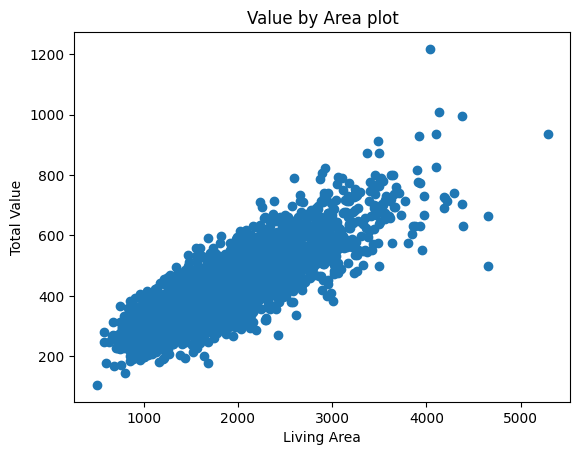

In [179]:
# plot LIVING_AREA vs. TOTAL_VALUE
plt.scatter(homes_df['LIVING_AREA'],homes_df['TOTAL_VALUE'])
plt.xlabel("Living Area")                                    # create a label for the x axis
plt.ylabel("Total Value")              # create a label for the y axis
plt.title("Value by Area plot")
plt.savefig("scatt.jpg")

## Part 2: Data preprocessing

#### Drop predictors (if you feel it's necessary)

In [180]:
# not necessary to drop any columns

#### Deal with NA values

In [181]:
homes_df1=homes_df.dropna().reset_index(drop=True)

#### Deal with categorical variables

In [182]:
# flag categorical varibales
homes_df1 = pd.get_dummies(homes_df1, drop_first = True)
homes_df1.head()

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,344.2,9965.0,1880,1352.0,2.0,6,3,1,1,1,0,0,0
1,412.6,6590.0,1945,1976.0,2.0,10,4,2,1,1,0,0,1
2,330.1,7500.0,1890,1371.0,2.0,8,4,1,1,1,0,0,0
3,498.6,13773.0,1957,2608.0,1.0,9,5,1,1,1,1,0,0
4,331.5,5000.0,1910,1438.0,2.0,7,3,2,0,1,0,0,0


#### Normalize data

In [183]:
from sklearn import preprocessing

In [184]:
# create a dataframe with just the predictors, and another with just the values for the response variable
# predictor_df should be helpful when you normalize the predictors below, and response_df should be helpful when you partition
# your data into train and test sets (hint: you can use "y = response_df" when you partition)

predictors_df2 = homes_df1[['LOT_SQFT', 'YR_BUILT', 'LIVING_AREA', 'FLOORS', 'ROOMS','BEDROOMS', 'FULL_BATH', 'HALF_BATH', 
              'KITCHEN', 'FIREPLACE','REMODEL_Old', 'REMODEL_Recent']]
response_df2 = homes_df1['TOTAL_VALUE']

In [185]:
# normalize predictors using standardization (i.e., force all predictors to have mean = 0  and standard deviation = 1)
z_score_norm = preprocessing.StandardScaler()
predictor_df_normalized = z_score_norm.fit_transform(predictors_df2)
predictor_df_normalized = pd.DataFrame(predictor_df_normalized, columns = predictors_df2.columns)
predictor_df_normalized.head(10)

,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,1.380770,-1.576306,-0.564957,0.710481,-0.692386,-0.272264,-0.568257,0.722730,-0.124847,-1.309419,-0.333684,-0.421262
1,0.116790,0.229535,0.589695,0.710481,2.090597,0.909517,1.347628,0.722730,-0.124847,-1.309419,-0.333684,2.373818
2,0.457596,-1.298484,-0.529799,0.710481,0.699105,0.909517,-0.568257,0.722730,-0.124847,-1.309419,-0.333684,-0.421262
3,2.806915,0.562921,1.759149,-1.537857,1.394851,2.091298,-0.568257,0.722730,-0.124847,0.460173,-0.333684,-0.421262
4,-0.478685,-0.742841,-0.405822,0.710481,0.003359,-0.272264,1.347628,-1.150811,-0.124847,-1.309419,-0.333684,-0.421262
5,-0.425505,0.368445,-1.105274,-1.537857,-0.692386,-0.272264,-0.568257,-1.150811,-0.124847,0.460173,2.996843,-0.421262
6,-0.478685,0.479574,0.478670,0.710481,0.003359,-0.272264,-0.568257,0.722730,-0.124847,-1.309419,-0.333684,-0.421262
7,1.393878,0.368445,-0.846218,-1.537857,-0.692386,-0.272264,-0.568257,-1.150811,-0.124847,-1.309419,-0.333684,-0.421262
8,0.208546,0.590703,-1.046061,-1.537857,-1.388132,-0.272264,-0.568257,-1.150811,-0.124847,0.460173,-0.333684,2.373818
9,-0.443856,-1.020663,2.469704,0.710481,0.699105,0.909517,1.347628,-1.150811,-0.124847,-1.309419,-0.333684,-0.421262


## Part 3: Multiple Linear Regression

### First, train and test the multiple linear regression model with sklearn

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from dmba import regressionSummary, adjusted_r2_score  # using the dmba package for perforance evaluation

In [187]:
# partition data into train and test sets
X = predictor_df_normalized
y = response_df2
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [188]:
# train the LR model
linear_model = LinearRegression()
linear_model = linear_model.fit(train_X, train_y)

In [189]:
# print the coefficients
print('intercept ', linear_model.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': linear_model.coef_}))

intercept  392.7177854344719
         Predictor  coefficient
0         LOT_SQFT    23.816638
1         YR_BUILT    -0.074815
2      LIVING_AREA    52.189564
3           FLOORS    12.691033
4            ROOMS     2.521823
5         BEDROOMS    -0.241315
6        FULL_BATH     9.961379
7        HALF_BATH    10.341500
8          KITCHEN    -4.124398
9        FIREPLACE    11.332082
10     REMODEL_Old     2.719823
11  REMODEL_Recent     9.762506


In [190]:
# print performance metrics on training set using regressionSummary()
predicted_y_training = linear_model.predict(train_X)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y, predicted_y_training) ** 0.5, 4))
print("Mean Absolute Error (MAE): ", round(mean_absolute_error(train_y,predicted_y_training), 4))
print("Mean Absolute Percentage Error (MAPE): ", round(mean_absolute_percentage_error(train_y, predicted_y_training) * 100, 4))

Root Mean Squared Error (RMSE):  44.0222
Mean Absolute Error (MAE):  33.3665
Mean Absolute Percentage Error (MAPE):  8.698


In [191]:
# now, deploy the model on the test data
predicted_y_test = linear_model.predict(test_X)  # these are our y_hat values!!

result = pd.DataFrame({'Predicted': predicted_y_test, 'Actual': test_y,
                       'Residual': test_y - predicted_y_test})
result.head(20)

,Predicted,Actual,Residual
1822,326.948924,291.7,-35.248924
1998,377.324591,361.1,-16.224591
5124,384.895749,371.6,-13.295749
808,279.831242,215.5,-64.331242
4032,369.442969,325.7,-43.742969
3672,355.446079,331.8,-23.646079
3375,565.251762,523.4,-41.851762
3695,323.534359,338.9,15.365641
3211,361.441878,310.6,-50.841878
623,332.212173,195.3,-136.912173


In [192]:
# how did our model perform in prediction? Use regressionSummary()
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(test_y, predicted_y_test) ** 0.5, 4))
print("Mean Absolute Error (MAE): ", round(mean_absolute_error(test_y,predicted_y_test), 4))
print("Mean Absolute Percentage Error (MAPE): ", round(mean_absolute_percentage_error(test_y, predicted_y_test) * 100, 4))

Root Mean Squared Error (RMSE):  44.8031
Mean Absolute Error (MAE):  33.6772
Mean Absolute Percentage Error (MAPE):  8.8396


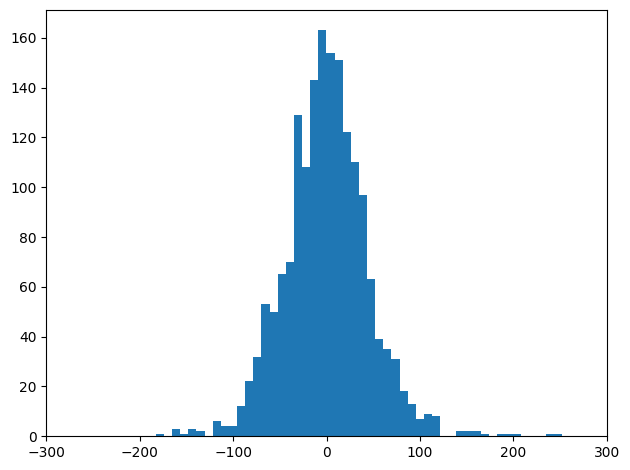

In [193]:
# let's see if our residuals are normally distributed (use matplotlib for this)
residuals = test_y - predicted_y_test

plt.hist(residuals, bins = 50)
plt.xlim([-300,300])
plt.tight_layout()
plt.savefig("nplot1.jpg")

### Now, train and test the model with statsmodels

In [158]:
import statsmodels.api as sm

In [160]:
# add constant to the training and testing data (the predictors) and train model

train_X = sm.add_constant(train_X)
test_X = sm.add_constant(test_X)

linear_model2 = sm.OLS(train_y, train_X).fit()

In [161]:
# print the coefficients
linear_model2.params

const             392.717785
LOT_SQFT           23.816638
YR_BUILT           -0.074815
LIVING_AREA        52.189564
FLOORS             12.691033
ROOMS               2.521823
BEDROOMS           -0.241315
FULL_BATH           9.961379
HALF_BATH          10.341500
KITCHEN            -4.124398
FIREPLACE          11.332082
REMODEL_Old         2.719823
REMODEL_Recent      9.762506
dtype: float64

In [162]:
# now, look at the training performance
predicted_y_training2 = linear_model2.predict(train_X)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y, predicted_y_training2) ** 0.5, 4))
print("Mean Absolute Error (MAE): ", round(mean_absolute_error(train_y,predicted_y_training2), 4))
print("Mean Absolute Percentage Error (MAPE): ", round(mean_absolute_percentage_error(train_y, predicted_y_training2) * 100, 4))

Root Mean Squared Error (RMSE):  44.0222
Mean Absolute Error (MAE):  33.3665
Mean Absolute Percentage Error (MAPE):  8.698


In [163]:
# now, deploy the model on the test data
predicted_y_test2 = linear_model2.predict(test_X)

In [164]:
# look at the testing performance
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(test_y, predicted_y_test2) ** 0.5, 4))
print("Mean Absolute Error (MAE): ", round(mean_absolute_error(test_y,predicted_y_test2), 4))
print("Mean Absolute Percentage Error (MAPE): ", round(mean_absolute_percentage_error(test_y, predicted_y_test2) * 100, 4))

Root Mean Squared Error (RMSE):  44.8031
Mean Absolute Error (MAE):  33.6772
Mean Absolute Percentage Error (MAPE):  8.8396


In [165]:
# look at the p-values
linear_model2.pvalues.round(4)

const             0.0000
LOT_SQFT          0.0000
YR_BUILT          0.9105
LIVING_AREA       0.0000
FLOORS            0.0000
ROOMS             0.0304
BEDROOMS          0.8164
FULL_BATH         0.0000
HALF_BATH         0.0000
KITCHEN           0.0000
FIREPLACE         0.0000
REMODEL_Old       0.0001
REMODEL_Recent    0.0000
dtype: float64

In [166]:
# drop the variables that are not significant (i.e., p>0.05)
train_X = train_X.drop(["YR_BUILT","BEDROOMS"], axis = 1)
test_X = test_X.drop(["YR_BUILT","BEDROOMS"], axis = 1)

In [167]:
# train the new model and print the performance metrics for training
linear_model3 = sm.OLS(train_y, train_X).fit()
linear_model3.params
predicted_y_training3 = linear_model3.predict(train_X)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y, predicted_y_training3) ** 0.5, 4))
print("Mean Absolute Error (MAE): ", round(mean_absolute_error(train_y,predicted_y_training3), 4))
print("Mean Absolute Percentage Error (MAPE): ", round(mean_absolute_percentage_error(train_y, predicted_y_training3) * 100, 4))

Root Mean Squared Error (RMSE):  44.0226
Mean Absolute Error (MAE):  33.369
Mean Absolute Percentage Error (MAPE):  8.6991


In [168]:
# deploy the model on the test data, and print the performance metrics for testing
predicted_y_test3 = linear_model3.predict(test_X)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(test_y, predicted_y_test3) ** 0.5, 4))
print("Mean Absolute Error (MAE): ", round(mean_absolute_error(test_y,predicted_y_test3), 4))
print("Mean Absolute Percentage Error (MAPE): ", round(mean_absolute_percentage_error(test_y, predicted_y_test3) * 100, 4))

Root Mean Squared Error (RMSE):  44.8052
Mean Absolute Error (MAE):  33.6777
Mean Absolute Percentage Error (MAPE):  8.84
